# Workshop 2 - Classifying Fashion-MNIST with PyTorch



[![Open in colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Arpit-Gole/AI_and_ML_Student_Club/blob/main/2022/workshop2/Workshop2.ipynb)

<b>Author: </b> Aaron Peter <br/>
<b>Contact on: </b> <a href="mailto:aaronpeter.poruthoor@student.adelaide.edu.au">aaronpeter.poruthoor@student.adelaide.edu.au</a> <br/>
<b>Created on: </b> 27/08/22 <br/>
<b>Last Modified on: </b> 07/10/22 <br/>

# Basic PyTorch


In [23]:
import torch
import numpy as np

A PyTorch Tensor is basically the same as a numpy array: it does not know anything about deep learning or computational graphs or gradients, and is just a generic n-dimensional array to be used for arbitrary numeric computation.

PyTorch is a library for processing tensors.

The biggest difference between a numpy array and a PyTorch Tensor is that a PyTorch Tensor can run on either CPU or GPU. To run operations on the GPU, just cast the Tensor to a cuda datatype [[1]](https://pytorch.org/tutorials/beginner/examples_tensor/polynomial_tensor.html#:~:text=PyTorch%3A%20Tensors,-A%20third%20order&text=A%20PyTorch%20Tensor%20is%20basically,used%20for%20arbitrary%20numeric%20computation.) .

In [10]:
t = torch.tensor(4.)
t.dtype

torch.float32

In [12]:
t4 = torch.tensor([
    [[11, 12, 13], 
     [13, 14, 15]], 
    [[15, 16, 17], 
     [17, 18, 19.]]])

t4

tensor([[[11., 12., 13.],
         [13., 14., 15.]],

        [[15., 16., 17.],
         [17., 18., 19.]]])

In [13]:
t4.shape

torch.Size([2, 2, 3])

In [14]:
t4.numel()

12

In [15]:
w = torch.tensor(4., requires_grad = True)
x = torch.tensor(2.)
b = torch.tensor(8., requires_grad = True)

In [16]:
y= w*x + b

In [17]:
y

tensor(16., grad_fn=<AddBackward0>)

In [18]:
y.backward()

In [19]:
w.grad

tensor(2.)

In [20]:
b.grad

tensor(1.)

In [21]:
y.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [24]:
# Input (temp, rainfall, humidity)
X = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [25]:
# Targets (wind, visibility)
y = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

In [26]:
X = torch.from_numpy(X)
y = torch.from_numpy(y)

In [27]:
w = torch.randn(2,3, requires_grad= True)
b = torch.randn(2, requires_grad= True)

In [28]:
b

tensor([ 2.0403, -0.5117], requires_grad=True)

In [29]:
# define the model
def model(X):
    return X @ w.t() + b

In [30]:
pred = model(X)
pred

tensor([[158.7988,  68.6287],
        [195.1603,  90.6259],
        [245.6448, 131.4455],
        [179.9075,  48.3249],
        [166.5108,  96.9227]], grad_fn=<AddBackward0>)

In [45]:
y

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

In [33]:
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [34]:
# calculate loss
loss = mse(pred, y)
print(loss)

tensor(6933.5024, grad_fn=<DivBackward0>)


In [35]:
loss.backward()

In [36]:
print(w)
print(w.grad)

tensor([[ 1.5221,  1.1372, -0.7103],
        [ 0.0662,  0.9044,  0.0863]], requires_grad=True)
tensor([[9879.9600, 9358.2168, 5872.0674],
        [-309.5165, -569.1105, -387.8918]])


In [37]:
b.grad

tensor([113.0044,  -4.8105])

In [38]:
lr = 1e-5

# disable gradient tracking
with torch.no_grad():
    
    # update weights and baises using gradients
    w-= w.grad*lr
    b-=b.grad*lr

    # clear the calculated gradients
    w.grad.zero_()
    b.grad.zero_()

In [39]:
w.grad

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [40]:
# calculate loss

pred = model(X)
loss = mse(pred, y)
print(loss)

tensor(4927.4819, grad_fn=<DivBackward0>)


In [41]:
# update weights for 100 epochs
for i in range(100):
    # make a prediction using current weights and biases
    pred = model(X)

    # calculate loss
    loss = mse(pred, y) 

    # calculate gradients
    loss.backward()

    # disable gradient tracking
    with torch.no_grad():
        # update weights and baises using gradients
        w-=w.grad*lr
        b-=b.grad*lr

        # clear the calculated gradients
        w.grad.zero_()
        b.grad.zero_()

In [42]:
# calculate loss
pred = model(X)
loss = mse(pred, y)
print(loss)

tensor(325.2629, grad_fn=<DivBackward0>)


In [43]:
# predictions
pred

tensor([[ 64.5346,  71.9714],
        [ 75.3410,  96.1740],
        [122.4670, 140.5101],
        [ 60.7458,  46.6085],
        [ 67.2300, 105.6168]], grad_fn=<AddBackward0>)

In [44]:
# labels
y

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network.we will use the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a is a set of 28x28 greyscale images of clothe.


In [46]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


# normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('data', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


In [ ]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

## Let us look at a random image in the dataset

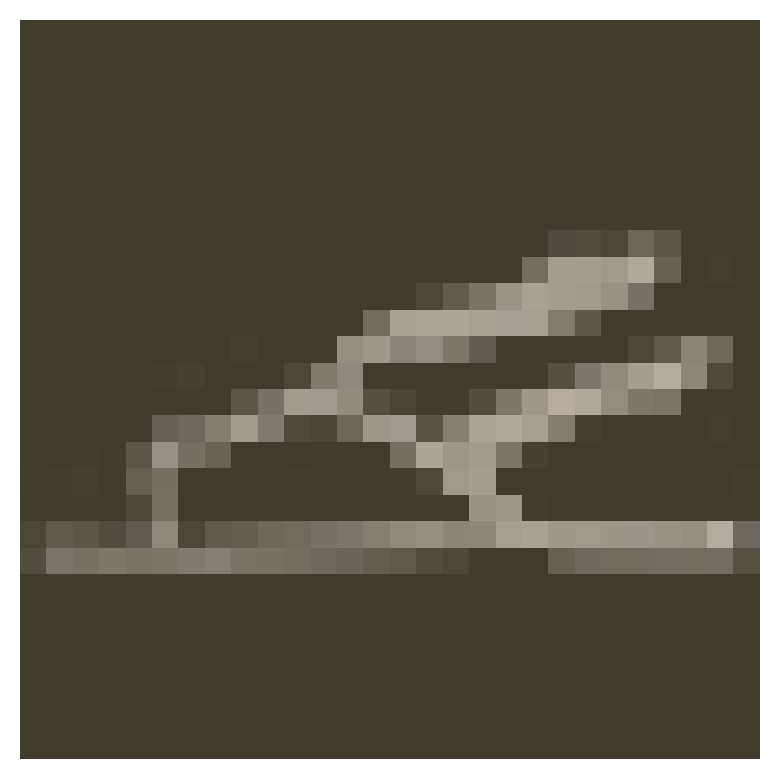

In [47]:
image, label = next(iter(trainloader))
imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations. It's up to you how many layers you add and the size of those layers.

In [48]:
from torch import nn, optim
import torch.nn.functional as F

In [49]:
# TODO: Define your network architecture here
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.act1 = nn.ReLU()

        self.fc2 = nn.Linear(256, 128)
        self.act2 = nn.ReLU()

        self.fc3 = nn.Linear(128, 64)
        self.act3 = nn.ReLU()

        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = self.fc1(x)
        x = self.act1(x)

        x = self.fc2(x)
        x = self.act2(x)
        
        x = self.fc3(x)
        x = self.act3(x)

        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) (something like `nn.CrossEntropyLoss` or `nn.NLLLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the predictions 
* Use the predictions and actual labels to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights and biases

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [51]:
# Create the network, define the criterion and optimizer
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [52]:
# Train the network here
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5189044130827064
Training loss: 0.39754641056855095
Training loss: 0.3598069588639843
Training loss: 0.3353059178095128
Training loss: 0.318598309948818


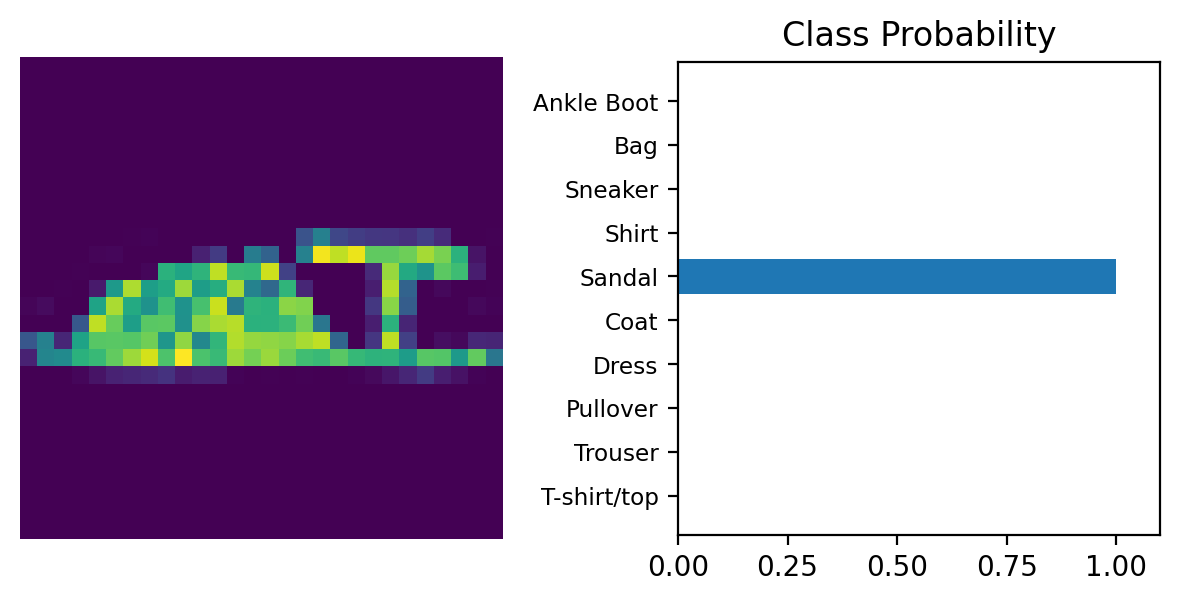

In [53]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

ps = torch.exp(model(img))

# Plot the image and probabilities
view_classify(img, ps, version='Fashion')

### Reference :

https://jovian.ai/aakashns/01-pytorch-basics